<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Understanding</a></span></li><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Understanding</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Helper Functions</a></span></li><li><span><a href="#Model-Performance-Visualization-Functions" data-toc-modified-id="Model-Performance-Visualization-Functions-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Model Performance Visualization Functions</a></span></li><li><span><a href="#Bounding-Box-Detection" data-toc-modified-id="Bounding-Box-Detection-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Bounding Box Detection</a></span><ul class="toc-item"><li><span><a href="#Convolutional-Neural-Network" data-toc-modified-id="Convolutional-Neural-Network-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Convolutional Neural Network</a></span></li><li><span><a href="#MobileNet" data-toc-modified-id="MobileNet-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>MobileNet</a></span></li><li><span><a href="#Single-Shot-MultiBox-Detector" data-toc-modified-id="Single-Shot-MultiBox-Detector-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Single Shot MultiBox Detector</a></span></li><li><span><a href="#Intersection-Over-Union-Analysis" data-toc-modified-id="Intersection-Over-Union-Analysis-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Intersection Over Union Analysis</a></span></li></ul></li><li><span><a href="#Context-and-Body-Detections" data-toc-modified-id="Context-and-Body-Detections-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Context and Body Detections</a></span><ul class="toc-item"><li><span><a href="#Convolutional-Neural-Network" data-toc-modified-id="Convolutional-Neural-Network-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Convolutional Neural Network</a></span></li><li><span><a href="#VGG16" data-toc-modified-id="VGG16-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>VGG16</a></span></li><li><span><a href="#VGG19" data-toc-modified-id="VGG19-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>VGG19</a></span></li><li><span><a href="#Residual-Network" data-toc-modified-id="Residual-Network-4.4.4"><span class="toc-item-num">4.4.4&nbsp;&nbsp;</span>Residual Network</a></span></li><li><span><a href="#Ported-Implementation-from-PyTorch" data-toc-modified-id="Ported-Implementation-from-PyTorch-4.4.5"><span class="toc-item-num">4.4.5&nbsp;&nbsp;</span>Ported Implementation from PyTorch</a></span></li></ul></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Model-Performances" data-toc-modified-id="Model-Performances-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model Performances</a></span></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Final Model</a></span></li><li><span><a href="#Live-Emotion-Annotation" data-toc-modified-id="Live-Emotion-Annotation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Live Emotion Annotation</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></div>

# Business Understanding

Say something about chatbots and how they are only limited to speech with no visuals. 

The pandemic has had its effects on peoples ability to 

# Data Understanding

# Data Preparation

The project depends on the following libraries to function. Users are advised to uncomment the following section to install the libraries.

In [27]:
######## Uncomment to install libraries ############
# ! pip install eli5
# ! pip install tensorbay
# ! pip install pycocotools
# ! protoc object_detection/protos/*.proto --python_out=.
# ! pip install object_detection
# ! pip install tf_slim

In [1]:
from tensorbay import GAS
from tensorbay.dataset import Dataset
import numpy as np
from PIL import Image, ImageDraw
from textwrap import wrap
import os
import cv2
import json
import sys
import gc
import dill as pickle
from tqdm import tqdm
import pandas as pd 
import six.moves.urllib as urllib
import tarfile
import zipfile
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Concatenate
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense, Rescaling 
from tensorflow.keras.layers import BatchNormalization, Dropout, GlobalMaxPooling2D
from tensorflow.keras import Model
from tensorflow.keras.applications import MobileNetV2, MobileNetV3Small,\
VGG16, VGG19, ResNet50V2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json
import imageio
import pathlib
from generate_class_weights import *

%matplotlib inline

In [24]:
# Configuration
SEED = 123
IMAGE_SIZE=(224,224,3)
EPOCHS=10
BATCH_SIZE=32 

In [25]:
cat2ind = {'Affection': 0, 'Anger': 1, 'Annoyance': 2, 'Anticipation': 3,
           'Aversion': 4, 'Confidence': 5, 'Disapproval': 6, 
           'Disconnection': 7, 'Disquietment': 8, 'Doubt/Confusion': 9,
           'Embarrassment': 10, 'Engagement': 11, 'Esteem': 12, 
           'Excitement': 13, 'Fatigue': 14, 'Fear': 15, 'Happiness': 16,
           'Pain': 17, 'Peace': 18, 'Pleasure': 19, 'Sadness': 20,
           'Sensitivity': 21, 'Suffering': 22, 'Surprise': 23, 
           'Sympathy': 24, 'Yearning': 25}

In [4]:
def cat_to_one_hot(y_cat):
    one_hot_cat = np.zeros(26)
    for em in y_cat:
        one_hot_cat[cat2ind[em]] = 1
    return one_hot_cat

In [27]:
def get_keys(path):
    with open(path) as f:
        return json.load(f)
keys = get_keys("/Users/zeaps/.secret/tensorbay_api.json")

api_key = keys['api_key']

In [10]:
def dataset_exists(seg, save_dir):
    files = ['box_context', 'context_arr', 'body_arr', 'cat_arr', 'cont_arr', 
             'bounding_box']
    for file in files:
        if not os.path.exists(os.path.join(save_dir, '%s_%s.npy' %(seg, file))):
            return False
    return True         

In [11]:
save_dir = './data/emotic_pre'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)    
for seg in ['test', 'val', 'train']:
    if not dataset_exists(seg, save_dir):
        dataset = Dataset("Emotic", GAS(api_key))
        segments = dataset.keys()
        segment = dataset[seg]
        box_context, context_arr, body_arr, cat_arr, cont_arr, bounding_box = [], [], [], [], [], []
        for i, data in enumerate(tqdm(segment)):
            with data.open() as fp:
                context = Image.open(fp).convert('RGB')
            context = np.asarray(context)
            context_cv = cv2.resize(context, IMAGE_SIZE[:2])
            mask = np.zeros(context_cv.shape[:2])
            box_dims, area = [], []
            for label_box2d in data.label.box2d:
                xmin = label_box2d.xmin
                ymin = label_box2d.ymin
                xmax = label_box2d.xmax
                ymax = label_box2d.ymax            
                body = context[ymin:ymax, xmin:xmax]
                body_cv = cv2.resize(body, IMAGE_SIZE[:2])
                box_dim = [xmin/context.shape[1], xmax/context.shape[1],
                            ymin/context.shape[0], ymax/context.shape[0]]
                context_arr.append(context_cv)
                body_arr.append(body_cv)
                cont_arr.append(np.array([int(label_box2d.attributes['valence']), 
                                          int(label_box2d.attributes['arousal']), 
                                          int(label_box2d.attributes['dominance'])]))
                cat = cat_to_one_hot(label_box2d.attributes['categories'])
                cat_arr.append(np.array(cat))
                area.append((box_dim[1]-box_dim[0])*(box_dim[3]-box_dim[2]))
                box_dims.append(box_dim)            
            box_context.append(context_cv)
            idx = np.argmax(area)
            bounding_box.append(box_dims[idx])
        box_context = np.array(box_context)
        context_arr = np.array(context_arr)
        body_arr = np.array(body_arr)
        cat_arr = np.array(cat_arr)
        cont_arr = np.array(cont_arr)
        bounding_box = np.array(bounding_box)
        np.save(os.path.join(save_dir, '%s_box_context.npy' % (seg)), box_context)
        np.save(os.path.join(save_dir, '%s_context_arr.npy' % (seg)), context_arr)
        np.save(os.path.join(save_dir, '%s_body_arr.npy' % (seg)), body_arr)
        np.save(os.path.join(save_dir, '%s_cat_arr.npy' % (seg)), cat_arr)
        np.save(os.path.join(save_dir, '%s_cont_arr.npy' % (seg)), cont_arr)
        np.save(os.path.join(save_dir, '%s_bounding_box.npy' % (seg)), bounding_box)
        if seg=='train':
            train_box_context = box_context
            train_context_arr = context_arr
            train_body_arr = body_arr
            train_cat_arr = cat_arr
            train_cont_arr = cont_arr
            train_bounding_box = bounding_box
            del box_context, context_arr, body_arr, cat_arr, cont_arr, bounding_box 
    else:
        if seg=='train':
            train_box_context = np.load(os.path.join(save_dir,'%s_box_context.npy' %(seg)))
#             train_context_arr = np.load(os.path.join(save_dir,'%s_context_arr.npy' %(seg)))
#             train_body_arr = np.load(os.path.join(save_dir,'%s_body_arr.npy' %(seg)))
            train_cat_arr = np.load(os.path.join(save_dir,'%s_cat_arr.npy' %(seg)))
#             train_cont_arr = np.load(os.path.join(save_dir,'%s_cont_arr.npy' %(seg)))
            train_bounding_box = np.load(os.path.join(save_dir,'%s_bounding_box.npy' %(seg)))            

In [ ]:
if not os.path.exists('data/emotic_pre/train_context_tensors.pkl'):
    train_context_tensor = tf.convert_to_tensor(train_context_arr)
    f = open('data/emotic_pre/train_context_tensors.pkl', 'wb')
    pickle.dump(train_context_tensor, f)
    f.close()    

In [ ]:
if not os.path.exists('data/emotic_pre/train_body_tensors.pkl'):
    train_body_tensor = tf.convert_to_tensor(train_body_arr)
    f = open('data/emotic_pre/train_body_tensors.pkl', 'wb')
    pickle.dump(train_body_tensor, f)
    f.close()    

In [30]:
rand_idx = np.random.choice(range(len(train_context_arr)), 9, replace=False)
fig = plt.figure(figsize=(20,20))
VAD = ['valence', 'arousal', 'dominance']
outer = gridspec.GridSpec(3, 3, wspace=0.2, hspace=0.1)
for i, idx in enumerate(rand_idx):
    inner = gridspec.GridSpecFromSubplotSpec(1, 2,
                    subplot_spec=outer[i], wspace=0.1, hspace=0)
    emot_cat = [cat for i,cat in enumerate(cat2ind.keys()) if train_cat_arr[idx,i]==1]    
    emot_cont = [cont+':'+str(train_cont_arr[idx,i]) for i,cont in enumerate(VAD)]
    # Wrap the title 
    text = '\n'.join(wrap(' '.join(emot_cat+['-']+emot_cont),22))    
    images = (train_context_arr[idx], train_body_arr[idx])
    for j, image in enumerate(images):
        ax = plt.Subplot(fig, inner[j])
        ax.imshow(image)
        ax.set_xticks([])
        ax.set_yticks([])
        if j==1:
            ax.set_title(text)
        fig.add_subplot(ax)    

NameError: name 'train_context_arr' is not defined

In [ ]:
rand_idx = np.random.choice(range(len(train_box_context)), 25, replace=False)
plt.figure(figsize=(20,20))
for i, idx in enumerate(rand_idx):
    plt.subplot(5,5,i+1)
    dims = tuple(np.round(train_bounding_box[idx]*CONTEXT_SIZE[0]).astype(int))    
    image = Image.fromarray(train_box_context[idx])
    draw = ImageDraw.Draw(image)
    draw.rectangle([dims[0::2],dims[1::2]],outline="red",width=3)
    plt.imshow(image)   
    plt.axis('off')    
plt.tight_layout()

In [13]:
train_emot_df = pd.DataFrame(train_cat_arr, columns=cat2ind.keys()).astype(int)
train_emot_df.head()

Affection  Anger  Annoyance  Anticipation  Aversion  Confidence  \
0          1      0          0             0         0           0   
1          1      0          0             0         0           1   
2          0      0          0             1         0           0   
3          0      0          0             0         0           0   
4          0      0          0             0         0           1   

   Disapproval  Disconnection  Disquietment  Doubt/Confusion  ...  Happiness  \
0            0              0             0                0  ...          1   
1            0              0             0                0  ...          1   
2            0              0             0                0  ...          0   
3            0              0             0                0  ...          1   
4            0              0             0                0  ...          1   

   Pain  Peace  Pleasure  Sadness  Sensitivity  Suffering  Surprise  Sympathy  \
0     0      0         1        0            0          0         0         0   
1     0      0         0        0            0          0         0         0   
2     0      0         0        0            0          0         0         0   
3     0      1         1        0            0          0         0         0   
4     0      1         0        0            0          0         0         0   

   Yearning  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 26 columns]

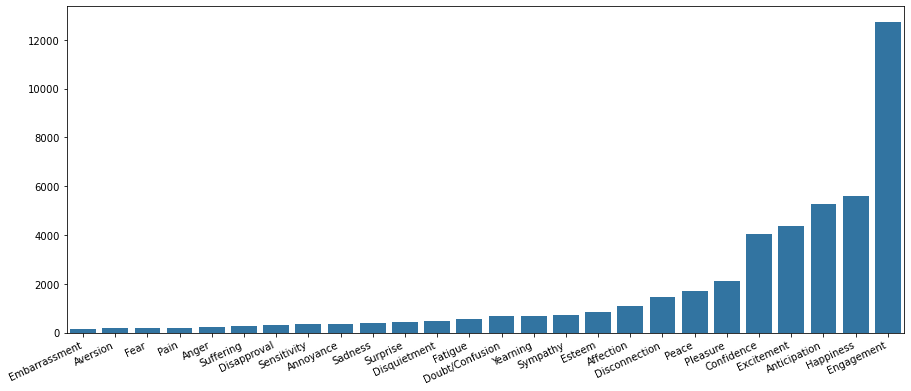

In [9]:
plt.figure(figsize=(15,6))
g = sns.barplot(x='index', y=0,
                data = train_emot_df.sum().reset_index().sort_values(0),
                color='tab:blue');
g.set_xticklabels(g.get_xticklabels(), rotation=25,
                  horizontalalignment='right');
g.set_xlabel('')
g.set_ylabel('');

<ipython-input-19-52dfb0a5877d>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(train_emot_df.corr(), dtype=np.bool)


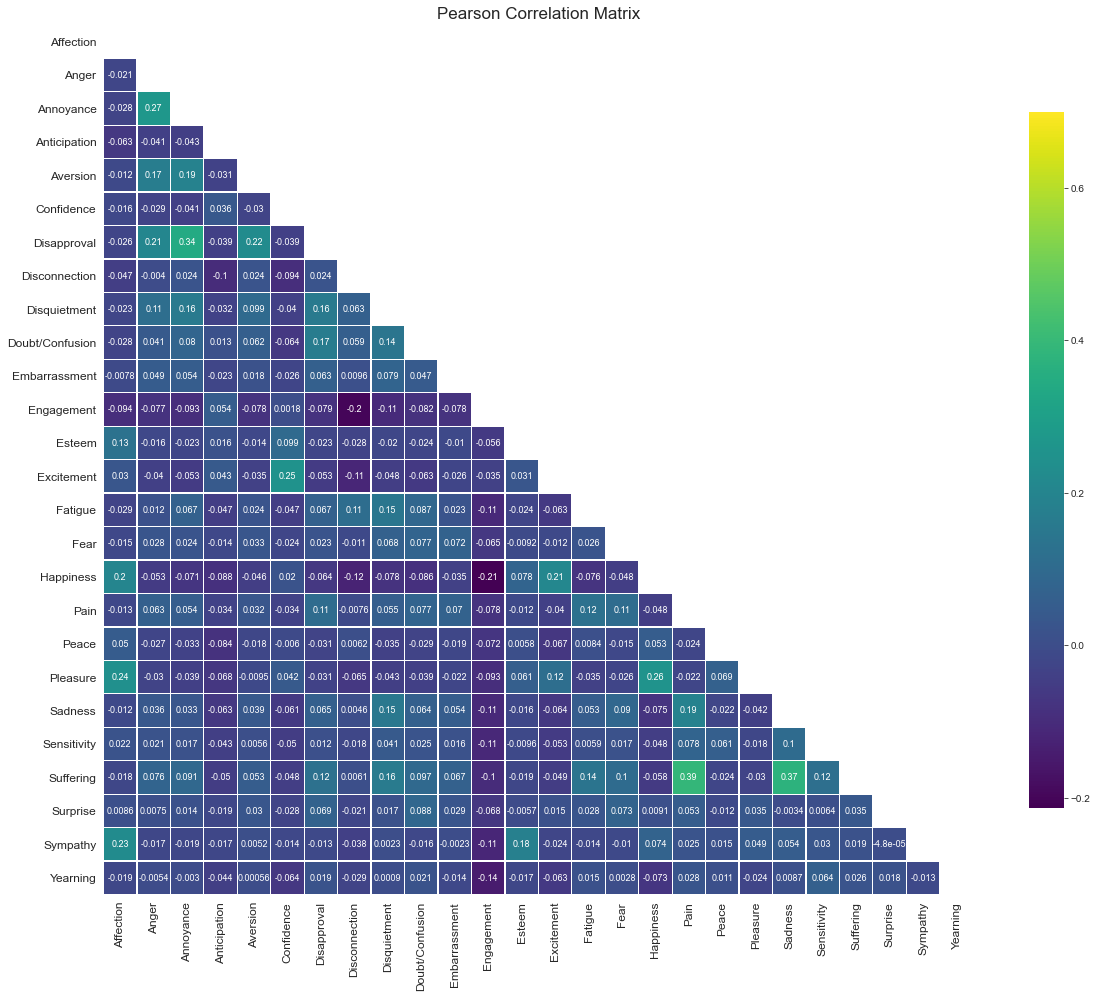

In [19]:
# Change seaborn style 
sns.set_style('white')

# Select features for correlation analysis    
features = train_emot_df.columns

# Create a triangular mask to show the lower triangular section of the heatmap
mask = np.zeros_like(train_emot_df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

# Initialize plot
fig, ax = plt.subplots(figsize=(20, 16))
plt.title('Pearson Correlation Matrix',fontsize=17)

# Plot the Pearson Correlation Matrix for the numeric columns
sns.heatmap(train_emot_df.corr(),linewidths=0.25,vmax=0.7,square=True,
            cmap="viridis",linecolor='w',annot=True,annot_kws={"size":9},
            mask=mask,cbar_kws={"shrink": .8},ax=ax);

# Adjust font size of ticks 
ax.set_xticklabels(ax.get_xmajorticklabels(),fontsize=12);
ax.set_yticklabels(ax.get_ymajorticklabels(),fontsize=12);

# Save plot 
plt.savefig('nb_images/corr.png')

In [8]:
class_sums = np.sum(train_cat_arr, axis=0) 
class_probs = dict(zip(cat2ind.keys(), class_sums/np.sum(class_sums)))
class_weights = generate_class_weights(train_cat_arr, multi_class=False, one_hot_encoded=True)
class_probs

{'Affection': 0.02359647378537814,
 'Anger': 0.004617662004816509,
 'Annoyance': 0.008108526104151477,
 'Anticipation': 0.11681138286825302,
 'Aversion': 0.003733898941693732,
 'Confidence': 0.08899494045646363,
 'Disapproval': 0.007180574887872561,
 'Disconnection': 0.03210269326793486,
 'Disquietment': 0.010472592298004905,
 'Doubt/Confusion': 0.014537902388369679,
 'Embarrassment': 0.0033803937164446213,
 'Engagement': 0.28139015929829214,
 'Esteem': 0.01862530655531252,
 'Excitement': 0.09626389165064846,
 'Fatigue': 0.011930801352157487,
 'Fear': 0.0039327456308963565,
 'Happiness': 0.12403614590928172,
 'Pain': 0.004153686396677051,
 'Peace': 0.037228519034046975,
 'Pleasure': 0.04648593712025806,
 'Sadness': 0.008992289167274254,
 'Sensitivity': 0.00797596164468306,
 'Suffering': 0.005766553986876119,
 'Surprise': 0.009279512162789156,
 'Sympathy': 0.015841452906475775,
 'Yearning': 0.014559996464947747}

# Modeling 

Data augmentation also included. 

In [8]:
seg='val'
val_box_context = np.load(os.path.join(save_dir,'%s_box_context.npy' %(seg)))
# val_context_arr = np.load(os.path.join(save_dir,'%s_context_arr.npy' %(seg)))
# val_body_arr = np.load(os.path.join(save_dir,'%s_body_arr.npy' %(seg)))
# val_cat_arr = np.load(os.path.join(save_dir,'%s_cat_arr.npy' %(seg)))
# val_cont_arr = np.load(os.path.join(save_dir,'%s_cont_arr.npy' %(seg)))
val_bounding_box = np.load(os.path.join(save_dir,'%s_bounding_box.npy' %(seg)))            

seg='test'
test_box_context = np.load(os.path.join(save_dir,'%s_box_context.npy' %(seg)))
# test_context_arr = np.load(os.path.join(save_dir,'%s_context_arr.npy' %(seg)))
# test_body_arr = np.load(os.path.join(save_dir,'%s_body_arr.npy' %(seg)))
# test_cat_arr = np.load(os.path.join(save_dir,'%s_cat_arr.npy' %(seg)))
# test_cont_arr = np.load(os.path.join(save_dir,'%s_cont_arr.npy' %(seg)))
test_bounding_box = np.load(os.path.join(save_dir,'%s_bounding_box.npy' %(seg)))      

## Helper Functions

In [ ]:
def iou(trues, preds):
    """Intersection over union (IoU) between box1 and box2    
    Arguments:
    box1 -- first box, list object with coordinates (box1_x1, box1_y1, box1_x2, box_1_y2)
    box2 -- second box, list object with coordinates (box2_x1, box2_y1, box2_x2, box2_y2)
    """
    iou = []
    for i in range(trues.shape[0]):
        # Assign variable names to coordinates for clarity
        (box1_x1, box1_x2, box1_y1, box1_y2) = trues[i]
        (box2_x1, box2_x2, box2_y1, box2_y2) = preds[i]
    
        # Calculate the (yi1, xi1, yi2, xi2) coordinates of the intersection of box1 and box2. Calculate its Area.
        xi1 = max(box1_x1,box2_x1)
        yi1 = max(box1_y1,box2_y1)
        xi2 = min(box1_x2,box2_x2)
        yi2 = min(box1_y2,box2_y2)
        inter_width = xi2-xi1
        inter_height = yi2-yi1
        inter_area = max(inter_height,0)*max(inter_width,0)

        # Calculate the Union area by using Formula: Union(A,B) = A + B - Inter(A,B)
        box1_area = (box1_x2-box1_x1)*(box1_y2-box1_y1)
        box2_area = (box2_x2-box2_x1)*(box2_y2-box2_y1)
        union_area = box1_area + box2_area - inter_area
        # compute the IoU
        iou.append(inter_area/union_area)    
    return np.array(iou)

In [22]:
def vis_pred_box(preds, true_bounding_box, true_box_context):
    rand_idx = np.random.choice(range(len(true_box_context)), 25, replace=False)
    plt.figure(figsize=(20,20))
    for i, idx in enumerate(rand_idx):
        plt.subplot(5,5,i+1)
        dims = tuple(np.round(true_bounding_box[idx]*IMAGE_SIZE[0]).astype(int))    
        image = Image.fromarray(true_box_context[idx])
        draw = ImageDraw.Draw(image)
        draw.rectangle([dims[0::2],dims[1::2]],outline="red",width=3)
        dims = tuple(np.round(preds[idx]*IMAGE_SIZE[0]).astype(int))    
        draw.rectangle([dims[0::2],dims[1::2]],outline="green",width=3)
        plt.imshow(image)   
        plt.axis('off')    
    plt.tight_layout()

In [ ]:
def load_model_from_tforg(model_name):
    base_url = 'http://download.tensorflow.org/models/object_detection/'
    model_file = model_name + '.tar.gz'
    model_dir = tf.keras.utils.get_file(
        fname=model_name, 
        origin=base_url + model_file,
        untar=True)
    model_dir = pathlib.Path(model_dir)/"saved_model"
    model = tf.saved_model.load(str(model_dir))
    model = model.signatures['serving_default']
    return model

In [ ]:
def ssd_best_pred_box(output_dict, ground_truth):
    output_dict = {key:value.numpy() for key,value in output_dict.items()}    
    output_mat = []
    for i in range(output_dict['detection_boxes'].shape[0]):
        idx = (output_dict['detection_scores'][i]>0.5) & (output_dict['detection_classes'][i]==1) 
        human_bounding_box = output_dict['detection_boxes'][i][idx,:]
        if human_bounding_box.size>0:            
            true_vals = np.tile(ground_truth,(human_bounding_box.shape[0],1))            
            ious = iou(true_vals,human_bounding_box)
            idx = np.argmax(ious)
            output_mat.append(human_bounding_box[idx])
        else:
            output_mat.append(np.zeros(ground_truth.shape))
    output_mat = np.array(output_mat)
    return output_mat[:,(1,3,0,2)]   

## Model Performance Visualization Functions

In [ ]:
def prepare_metrics(model_grid, train_val='train'):
    """
    This function plots metrics on different datasets
    model_grid: Custom_GridSearchCV object
    Run this code after fitting. 
    """    
    # Convert cross_eval from Custom_GrisSearchCV into dataframe
    # Table is transposed to set dataset as columns
    tmp = pd.DataFrame(model_grid.cross_eval).transpose()
    tmp = pd.DataFrame(tmp[train_val].to_dict())
    # Initialize metrics dataframe 
    metrics = pd.DataFrame(columns=list(tmp.columns)+['metric'])
    # Iterate through each metric in 'tmp' and assign to metrics dataframe
    for idx in tmp.index:
        # Create an empty dataframe 
        metric = pd.DataFrame(tmp.loc[idx,:].to_dict())
        # Update type of metric 
        metric['metric'] = idx
        # Append results
        metrics = pd.concat([metrics, metric])
    # Reset metrics
    metrics = metrics.reset_index()
    # Rename 'index' column to 'fold'
    metrics.rename(columns={'index':'fold'}, inplace=True)
    # Initialiaze squeezed metrics dataframe
    squeezed_metrics = pd.DataFrame(columns=['fold','metric','dataset',
                                             'value','train_val'])
    # Iterate through each column and populate 'squeezed_metrics'
    for col in model_grid.cross_eval.keys():
        # Create empty dataframe 
        sq_met = pd.DataFrame(columns=squeezed_metrics.columns)
        # Populate 'sq_met'
        sq_met.fold = metrics.fold
        sq_met.metric = metrics.metric
        sq_met.dataset = col
        sq_met.value = metrics[col]
        sq_met.train_val = train_val
        # Append 'sq_met' to 'squeezed_metrics'
        squeezed_metrics = pd.concat([squeezed_metrics, sq_met], 
                                     ignore_index=True)
    # Set log-loss to a variable and remove the column from 'squeezed_metrics'
    log_loss_vals =  squeezed_metrics.loc[squeezed_metrics.metric =='log_loss_score']
    squeezed_metrics.drop(log_loss_vals.index, inplace=True)
    # Get fpr and tpr from 'squeezed_metrics'
    fpr = squeezed_metrics.loc[squeezed_metrics.metric=='fpr']
    tpr = squeezed_metrics.loc[squeezed_metrics.metric=='tpr']
    # Drop 'fpr' and 'tpr' from 'squeezed_metrics'
    squeezed_metrics.drop(fpr.index, inplace=True)
    squeezed_metrics.drop(tpr.index, inplace=True)
    # Find the longest fpr/tpr
    roc_max_len = fpr.value.apply(lambda x: len(x)).max()
    # Reset indices for 'fpr' and 'tpr'
    fpr = fpr.reset_index()
    tpr = tpr.reset_index()
    # Initialize 'fpr_mat' and 'tpr_mat' 
    fpr_mat = np.zeros((len(fpr), roc_max_len))
    tpr_mat = np.zeros((len(tpr), roc_max_len))
    # Iteratre through each fpr and tpr, and interpolate values
    for i in range(len(fpr)):
        # Create a uniformly spaced 'fpr' values
        xvals = np.linspace(0, 1, roc_max_len)
        # Interpolate y values 
        yinterp = np.interp(xvals, fpr.loc[i,'value'], tpr.loc[i,'value'])
        # Update fpr and tpr matrix 
        fpr_mat[i,:] = xvals
        tpr_mat[i,:] = yinterp
    # Create roc_vals dictionary 
    roc_vals = {}
    # Instead of taking the entire matrices, the mean and std values are 
    # selected for 'fpr' and 'tpr'
    roc_vals['fpr_mean'] = fpr_mat.mean(axis=0)
    roc_vals['tpr_mean'] = tpr_mat.mean(axis=0)
    roc_vals['fpr_std'] = fpr_mat.std(axis=0)
    roc_vals['tpr_std'] = tpr_mat.std(axis=0)
    # Return squeezed metrics, log loss and roc 
    return squeezed_metrics, log_loss_vals, roc_vals


def plot_metrics(model_grid):
    """
    This function plots metrics on different datasets
    model_grid: Custom_GridSearchCV object
    Run this code after fitting. 
    """    
    # Get parameters for training 
    tr_metrics, tr_log_loss, tr_roc_vals = prepare_metrics(model_grid, 
                                                           'train')
    # Get parameters for validation
    vl_metrics, vl_log_loss, vl_roc_vals = prepare_metrics(model_grid, 
                                                           'cross_validate')
    # Combine log losses for training and validation 
    log_loss_combined = pd.concat([tr_log_loss,vl_log_loss])
    # Create figure to plot log loss and ROC curve 
    fig, axes = plt.subplots(1 , 2, figsize=(15,6))
    # Log loss for training and validation 
    g1 = sns.barplot(x="dataset", y="value", hue="train_val",
                     data=log_loss_combined, ax=axes[0])
    # Format labels and title 
    g1.set_xlabel('')
    g1.set_ylabel('Log Loss',fontsize=13)
    g1.set_title('Log Loss vs Dataset',fontsize=15)
    g1.legend(title='Fold')
    limits = (np.floor(min(log_loss_combined.value)*10)/10,
              np.ceil(max(log_loss_combined.value)*10)/10)
    g1.set_ylim(limits)
    
    # Plot mean ROC curve for training fold
    g2 = sns.lineplot(x=tr_roc_vals['fpr_mean'], y=tr_roc_vals['tpr_mean'], 
                  label='train', ax=axes[1], color='tab:blue')
    # Plot the standard deviation for training ROC 
    plt.fill_between(tr_roc_vals['fpr_mean'], 
                     tr_roc_vals['tpr_mean'] - tr_roc_vals['tpr_std'],
                     tr_roc_vals['tpr_mean'] + tr_roc_vals['tpr_std'],
                     color='tab:blue', alpha=0.2)
    # Plot mean ROC curve for validation fold
    sns.lineplot(x=vl_roc_vals['fpr_mean'], y=vl_roc_vals['tpr_mean'], 
                  label='cross_validate', ax=axes[1], color='tab:orange')
    # Plot the standard deviation for validation ROC
    plt.fill_between(vl_roc_vals['fpr_mean'], 
                     vl_roc_vals['tpr_mean'] - vl_roc_vals['tpr_std'],
                     vl_roc_vals['tpr_mean'] + vl_roc_vals['tpr_std'],
                     color='tab:orange', alpha=0.2)
    
    # Format labels and title 
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    g2.set_xlabel('False Positve Rate', fontsize=13)
    g2.legend(title='Fold')
    g2.set_ylabel('True Positve Rate', fontsize=13)
    g2.set_title('ROC Curve',fontsize=15)
    
    # Plot metrics for training fold
    fig, axes = plt.subplots(2 , 1, figsize=(15,12))
    g3 = sns.barplot(x="dataset", y="value", hue="metric",
                     data=tr_metrics, ax=axes[0])
    # Format labels and title
    g3.set_xlabel('')
    g3.set_ylabel('Score', fontsize=13)
    g3.set_title('Training Scores vs Dataset',fontsize=15)
    g3.legend(title='Metric')
    limits = (np.floor(min(tr_metrics.value)*10)/10,
              np.ceil(max(tr_metrics.value)*10)/10)
    g3.set_ylim(limits)
    
    # Plot metrics for validation fold
    g4 = sns.barplot(x="dataset", y="value", hue="metric",
                     data=vl_metrics, ax=axes[1])
    # Format labels and title
    g4.set_xlabel('')
    g4.set_ylabel('Score',fontsize=13)
    g4.set_title('Cross Validation Scores vs Dataset',fontsize=15)
    g4.legend(title='Metric')
    limits = (np.floor(min(vl_metrics.value)*10)/10,
              np.ceil(max(vl_metrics.value)*10)/10)
    g4.set_ylim(limits)

In [ ]:
def plot_ious(ious, model_names, types):
    plt.figure(figsize=(15,8))
    report = pd.DataFrame(columns=['model','value','type'])
    for i, iou_type in enumerate(ious):
        for j, iou_value in enumerate(iou_type):
            tmp = pd.DataFrame(columns=['model','value','type'])
            tmp['value'] = iou_value
            tmp['model'] = model_names[j]
            tmp['type'] = types[i]
            report = pd.concat([report,tmp],ignore_index=True)
    g = sns.barplot(x="model", y="value", hue="type",
                     data=report)
    # Format labels and title
    g.set_xlabel('')
    g.set_ylabel('IoU',fontsize=13)
    g.set_title('Intersection over Union of Bounding Box Predicting Models',fontsize=15)
    g.legend(title='Dataset')    

In [17]:
def plot_history(history):
    # Metrics for plotting 
    metrics = ['loss', 'accuracy']
    # Set epoch lengths as x-values
    epochs = list(range(1, len(history['loss'])+1))
    # Plot metrics 
    fig, axes = plt.subplots(1, 2, figsize=(15,6))
    # Iterate through each metrics
    for metric, ax in zip(metrics, axes.flatten()):
        # Plot training metrics 
        sns.lineplot(x=epochs, y=history[metric], label='Train', ax=ax)
        # Plot validation metrics 
        sns.lineplot(x=epochs, y=history['val_'+metric], label='Validate', ax=ax)
        # Set axis labels
        ax.set_xlabel('Epoch')
        ax.set_ylabel(metric.title())
        ax.legend();

In [ ]:
def plot_confusion_matrix(y_true, y_pred, normalize=None, annot=True):
    '''
    Simplified confusion matrix plotter 
    y_true: True y values 
    y_pred: Predicted y values 
    normalize: 'normalize' input used for confusion_matrix
    '''
    # Generate a square plot
    fig, ax = plt.subplots(figsize=(5,4))
    
    # Create a confusion matrix
    cm = confusion_matrix(y_true, y_pred, normalize=normalize)
    
    # Plot heatmap  
    sns.heatmap(cm, annot=True, cmap='viridis', linecolor='black', 
                linewidth=1, ax=ax)
    # Apply labels and limits
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    lim = y_true.shape[1]+1
    plt.xlim(lim,0)
    plt.ylim(0,lim)

## Bounding Box Detection

### Convolutional Neural Network

In [ ]:
if not os.path.exists('preds/cnn_model_weight.pkl'):
    inputs = layers.Input(shape=IMAGE_SIZE)
    cnn_layer = tf.keras.layers.Rescaling(1./255)(inputs)
    cnn_layer = layers.Conv2D(16, 3, padding='same', activation='relu')(cnn_layer)
    cnn_layer = layers.MaxPooling2D()(cnn_layer)
    cnn_layer = layers.Conv2D(32, 3, padding='same', activation='relu')(cnn_layer)
    cnn_layer = layers.MaxPooling2D()(cnn_layer)
    cnn_layer = layers.Conv2D(64, 3, padding='same', activation='relu')(cnn_layer)
    cnn_layer = layers.MaxPooling2D()(cnn_layer)
    cnn_layer = layers.Flatten()(cnn_layer)
    cnn_layer = layers.Dense(128, activation='relu')(cnn_layer)
    cnn_layer = layers.Dense(64, activation='relu')(cnn_layer)
    cnn_layer = layers.Dense(32, activation='relu')(cnn_layer)
    cnn_prediction_layer = layers.Dense(train_bounding_box.shape[1], 
                                    activation='sigmoid')(cnn_layer)
    cnn_model = models.Model(inputs, outputs=cnn_prediction_layer)
    cnn_model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['accuracy'])   
    cnn_history = cnn_model.fit(train_box_context, train_bounding_box,
                            shuffle=True, batch_size=BATCH_SIZE,
                            epochs=EPOCHS,
                            validation_data=(val_box_context, 
                                             val_bounding_box));
    cnn_history = cnn_history.history
    cnn_val_preds = cnn_model.predict(val_box_context)
    cnn_test_preds = cnn_model.predict(test_box_context)
    f = open('preds/cnn_model_weight.pkl', 'wb')
    pickle.dump(cnn_val_preds, f)
    pickle.dump(cnn_test_preds, f)
    pickle.dump(cnn_history.history, f)
    f.close()
    cnn_model.save('weights/cnn_model_weight.h5')
else:
    with open('preds/cnn_model_weight.pkl', 'rb') as f:
        # Skip 'tokenizer'
        cnn_val_preds = pickle.load(f)
        # Skip 'train_texts'
        cnn_test_preds = pickle.load(f)
        # Skip 'val_texts'
        cnn_history = pickle.load(f)
    cnn_model = keras.models.load_model('weights/cnn_model_weight.h5')

In [ ]:
cnn_model.summary()

In [ ]:
# Plot history 
plot_history(cnn_history)

In [ ]:
vis_pred_box(cnn_val_preds, val_bounding_box, val_box_context)

### MobileNet

In [9]:
def mobile_net_func():
    inputs = Input(shape=IMAGE_SIZE)
    mobile_net = MobileNetV2(input_shape=IMAGE_SIZE, weights='imagenet')
    mobile_net_layer = mobile_net(inputs)
    mobile_net_layer = Flatten()(mobile_net_layer)
    mobile_net_layer = Dense(128, activation='relu')(mobile_net_layer)
    mobile_net_layer = Dense(64, activation='relu')(mobile_net_layer)
    mobile_net_layer = Dense(32, activation='relu')(mobile_net_layer)
    mobile_net_prediction_layer = Dense(train_bounding_box.shape[1], 
                                        activation='sigmoid')(mobile_net_layer)
    mobile_net_model = Model(inputs,
                                outputs = mobile_net_prediction_layer)
    mobile_net_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return mobile_net_model

In [24]:
if not os.path.exists('preds/mobile_net_model_weight.pkl'):
    mobile_net_model = mobile_net_func()
    tf.keras.backend.clear_session()
    gc.collect()
    mobile_net_history = mobile_net_model.fit(train_box_context, train_bounding_box,
                                          shuffle=True, batch_size=BATCH_SIZE,
                                          validation_data=(val_box_context, 
                                                           val_bounding_box),
                                          epochs=EPOCHS);
    mobile_net_history = mobile_net_history.history
    mobile_net_val_preds = []
    for val in tqdm(val_box_context):
        tmp = np.zeros([1]+list(IMAGE_SIZE))
        tmp[0] = val
        mobile_net_val_preds.append(mobile_net_model.predict(tmp))
    mobile_net_val_preds = np.squeeze(mobile_net_val_preds)
    mobile_net_test_preds = []
    for test in tqdm(test_box_context):
        tmp = np.zeros([1]+list(IMAGE_SIZE))
        tmp[0] = test
        mobile_net_test_preds.append(mobile_net_model.predict(tmp))
    mobile_net_test_preds = np.squeeze(mobile_net_test_preds)
    f = open('preds/mobile_net_model_weight.pkl', 'wb')
    pickle.dump(mobile_net_val_preds, f)
    pickle.dump(mobile_net_test_preds, f)
    pickle.dump(mobile_net_history, f)
    f.close()
    mobile_net_model.save('weights/mobile_net_weight.h5')
else:
    with open('preds/mobile_net_model_weight.pkl', 'rb') as f:
        # Skip 'tokenizer'
        mobile_net_val_preds = pickle.load(f)
        # Skip 'train_texts'
        mobile_net_test_preds = pickle.load(f)
        # Skip 'val_texts'
        mobile_net_history = pickle.load(f)       
    # Load pretrained model
    mobile_net_model = load_model('weights/mobile_net_weight.h5')

In [25]:
mobile_net_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1000)             3538984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 128)               128128    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                             

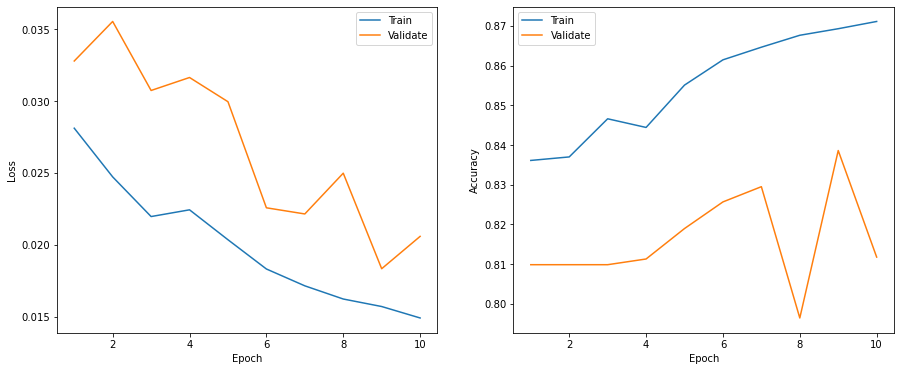

In [19]:
# Plot history 
plot_history(mobile_net_history)

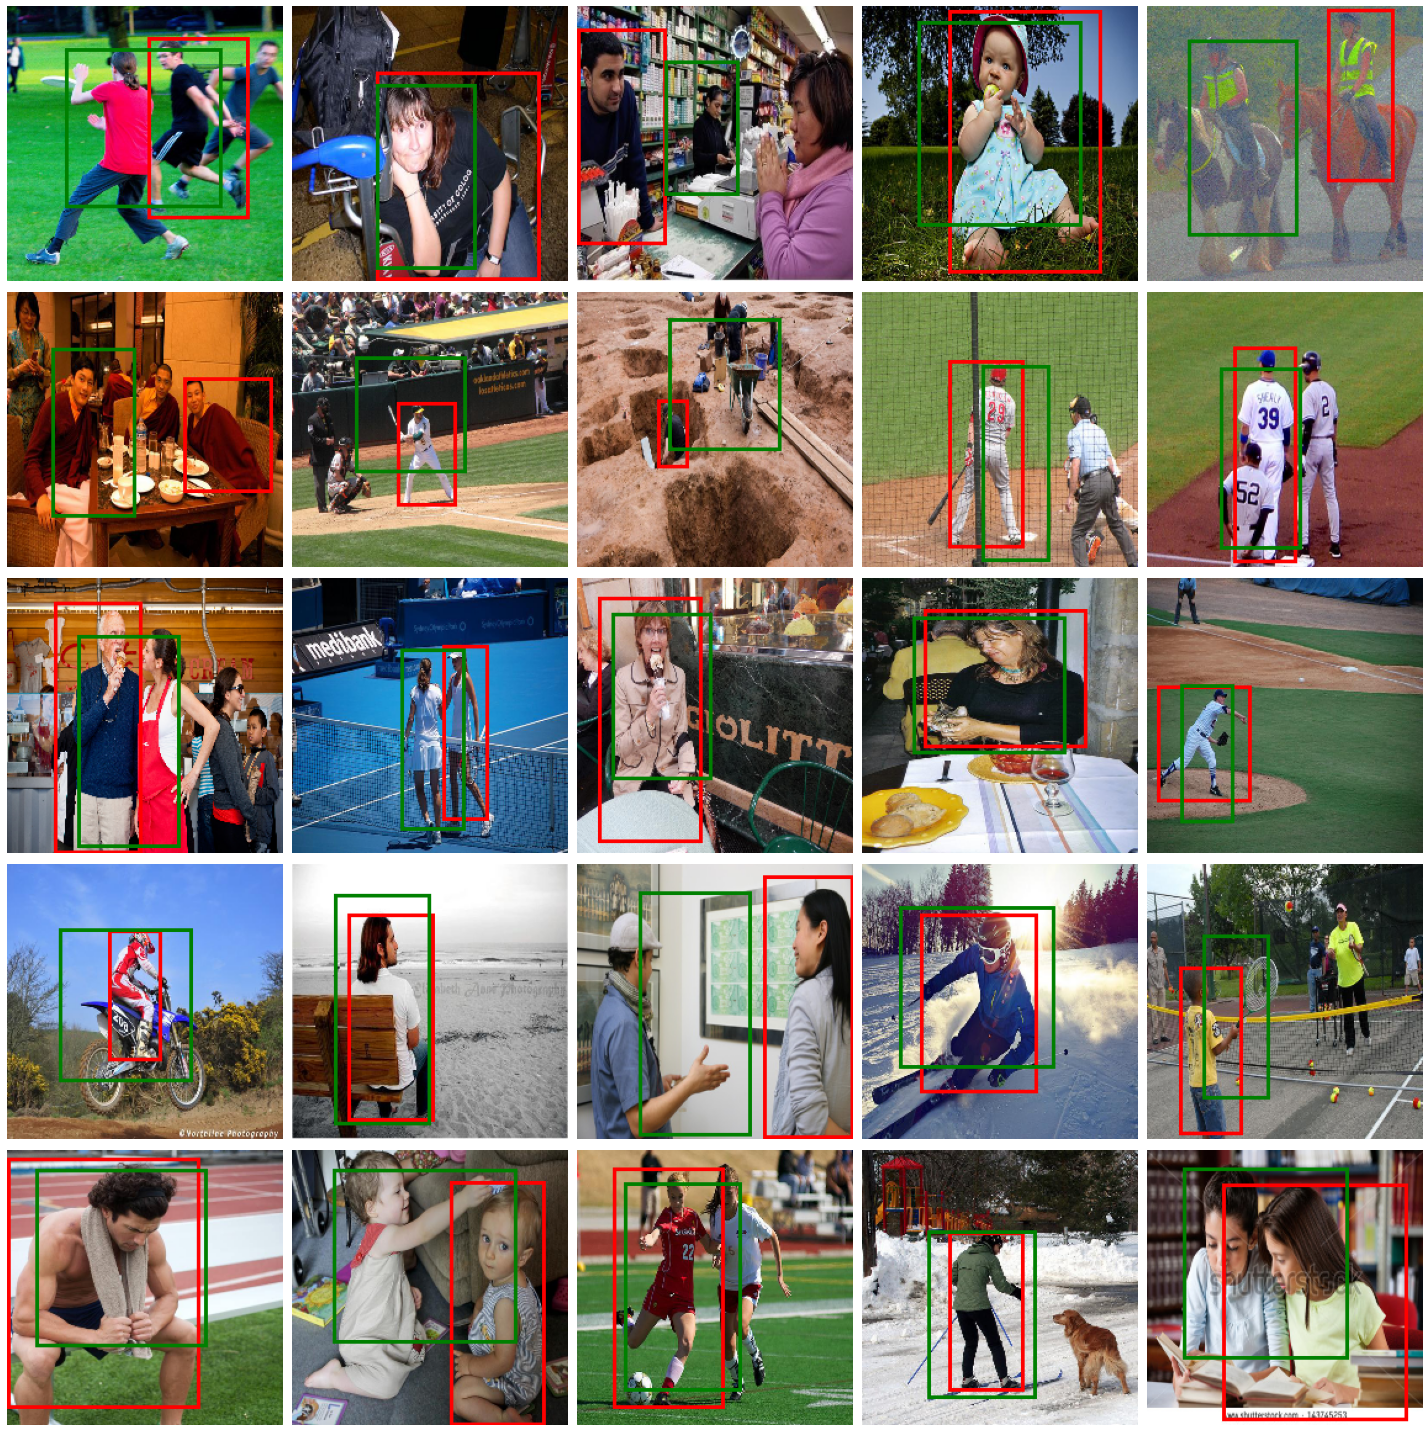

In [27]:
vis_pred_box(mobile_net_val_preds, val_bounding_box, val_box_context)

### Single Shot MultiBox Detector 

In [ ]:
model_name = 'ssd_mobilenet_v1_coco_2017_11_17'
ssd_model = load_model_from_tforg(model_name)    

In [ ]:
print(ssd_model.inputs)
ssd_model.output_dtypes

In [ ]:
def ssd_pred(box_context, bounding_box):
    input_tensor = tf.convert_to_tensor(box_context)
    input_tensor = input_tensor[tf.newaxis,...]
    output_dict = ssd_model(input_tensor)
    return ssd_best_pred_box(output_dict, bounding_box)

In [ ]:
if not os.path.exists('preds/ssd_model_weight.pkl'):
    ssd_val_preds = []
    for box_context, bounding_box in tqdm(zip(val_box_context, val_bounding_box)):
        ssd_val_preds.append(ssd_pred(box_context, bounding_box))
    ssd_val_preds = np.squeeze(ssd_val_preds)
    ssd_test_preds = []
    for box_context, bounding_box in tqdm(zip(test_box_context, test_bounding_box)):
        ssd_test_preds.append(ssd_pred(box_context, bounding_box))
    ssd_test_preds = np.squeeze(ssd_test_preds)
    f = open('preds/ssd_model_weight.pkl', 'wb')
    pickle.dump(ssd_val_preds, f)
    pickle.dump(ssd_test_preds, f)
    f.close()
else:
    with open('preds/ssd_model_weight.pkl', 'rb') as f:
        # Skip 'tokenizer'
        ssd_val_preds = pickle.load(f)
        # Skip 'train_texts'
        ssd_test_preds = pickle.load(f)

In [ ]:
vis_pred_box(ssd_val_preds, val_bounding_box, val_box_context)

### Intersection Over Union Analysis

In [ ]:
cnn_val_iou = iou(val_bounding_box, cnn_val_preds)
cnn_test_iou = iou(test_bounding_box, cnn_test_preds)

mobile_net_val_iou = iou(val_bounding_box, mobile_net_val_preds)
mobile_net_test_iou = iou(test_bounding_box, mobile_net_test_preds)

ssd_val_iou = iou(val_bounding_box, ssd_val_preds)
ssd_test_iou = iou(test_bounding_box, ssd_test_preds)

ious = [[cnn_val_iou, mobile_net_val_iou,ssd_val_iou],
        [cnn_test_iou, mobile_net_test_iou, ssd_test_iou]]
plot_ious(ious, ['Custom CNN', 'Modified MobileNet', 'TensorFlow SSD'], 
         ['Training', 'Validation'])

In [ ]:
del train_box_context, train_bounding_box, val_box_context, val_bounding_box, test_box_context, test_bounding_box

## Context and Body Detections

Create siamese network class here 

<center>
<img width="600" height="400" src="nb_images/context_body_cnn.png">
</center>

<caption><center> Proposed end-to-end model for emotion recognition in context. The model consists of two feature extraction modules and a fusion network for jointly estimating the discrete categories and the continuous dimensions.
</center></caption>

In [26]:
def discrete_loss(class_probability):
    """
    Returns Euclidean loss of after applying class weight to the 
    output layer.
    
    Parameters:
        class_probability: class probability list computed for an imbalanced data
    
    Returns:
        Euclidean loss function with class probability  
    """
    def loss(y_true, y_pred):
#         tf.numpy_function
        y_true = y_true.numpy()
        y_pred = y_pred.numpy()
        dist = np.square(np.subtract(y_true, y_pred))
        class_weight = 1/(np.array(class_probability)+1.2)
        weight = np.reshape(class_weight, (1, len(class_weight)))
        weight = np.repeat(weight, dist.shape[0], axis=0)
        losses = np.multiply(dist,weight)
        losses = tf.convert_to_tensor(losses, np.float64)
        return losses
    return loss

d_loss = discrete_loss(list(class_probs.values()))

In [9]:
# def context_body_model_builder(base_model, trainable=False):
#     if not trainable:
#         base_model.trainable = False
# #     input_context = layers.Input(shape=IMAGE_SIZE)
#     input_body = layers.Input(shape=IMAGE_SIZE)
# #     base_context = base_model(input_context)
# #     flat_context = layers.Flatten()(base_context)
#     base_body = base_model(input_body)
# #     flat_body = layers.Flatten()(base_body)
# #     concat_layer = layers.Concatenate()([base_context, base_body])
#     flat_layer = layers.Flatten()(base_body)
#     batch_norm = tf.keras.layers.BatchNormalization()(flat_layer)
#     denser = layers.Dense(256, activation='relu')(batch_norm)
#     drop = layers.Dropout(0.5)(denser)
#     output_context = layers.Dense(len(class_probs), name='out_cat')(drop)
#     output_body = layers.Dense(3, name='out_cont')(drop)
# #     model = models.Model(inputs=[input_context, input_body], 
# #                              outputs=[output_context,output_body])
#     model = models.Model(inputs=input_body, 
#                              outputs=[output_context,output_body])

#     loss = {'out_cat': d_loss, 'out_cont':tf.losses.huber}
#     model.compile(optimizer='adam',
#                   loss=loss,
#                   metrics=['accuracy'])  
#     return model 

In [125]:
def context_body_model_builder(base_model, trainable=False, hasinput=False):
    base_model.trainable = trainable
    input_body = Input(shape=IMAGE_SIZE)
    x = base_model(input_body)
    x = Dense(512, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    out_cat = Dense(len(class_weights), name='out_cat')(x)
    model = Model(inputs=input_body, 
                             outputs=out_cat)
    model.compile(optimizer=Adam(),
                  loss=tf.nn.sigmoid_cross_entropy_with_logits,
                  metrics=['accuracy'])  
    return model 

In [ ]:
def sigmoid_cross_entropy_with_logits():
    return tf.nn.sigmoid_cross_entropy_with_logits

In [18]:
# t = np.random.rand([10,224,224,3])
model = load_model('weights_from_colab/model_emotic1.h5')


In [20]:
tmp = np.random.rand(10,512)
model.predict([tmp,tmp])[0]

array([[0.04613698, 0.03912631, 0.05234649, 0.14190313, 0.02877282,
        0.09075212, 0.04092657, 0.10233542, 0.04799395, 0.0561026 ,
        0.04244164, 0.5434705 , 0.04940892, 0.09763741, 0.0609626 ,
        0.03292269, 0.2044733 , 0.05658737, 0.09266438, 0.08052815,
        0.05489862, 0.05806699, 0.0607187 , 0.04658222, 0.04954519,
        0.06599626],
       [0.05033153, 0.0439136 , 0.05897864, 0.15473102, 0.02478623,
        0.09843563, 0.04732731, 0.10466459, 0.0500844 , 0.06090357,
        0.0405469 , 0.5393266 , 0.04511715, 0.10435791, 0.05861964,
        0.03022753, 0.18973294, 0.05005716, 0.08433206, 0.07122371,
        0.06306148, 0.05920641, 0.05320801, 0.04521361, 0.04462681,
        0.06956013],
       [0.05119197, 0.04323066, 0.05379988, 0.16858211, 0.02717826,
        0.10667902, 0.04744818, 0.10232697, 0.05457337, 0.06038718,
        0.03994531, 0.5522249 , 0.04113031, 0.11871775, 0.05656849,
        0.02791401, 0.18757302, 0.05027486, 0.08105263, 0.07610396,
      

### Convolutional Neural Network

In [130]:
def cnn_body_model_builder():
    input_body = Input(shape=IMAGE_SIZE)
    x = Rescaling(1./255)(input_body)
    x = Conv2D(4, 3, padding='same', activation='relu')(x)
    x = Conv2D(4, 3, padding='same', activation='relu')(x)
    x = MaxPooling2D()(x) 

    x = Conv2D(8, 3, padding='same', activation='relu')(x)
    x = Conv2D(8, 3, padding='same', activation='relu')(x)
    x = MaxPooling2D()(x)    

    x = Conv2D(16, 3, padding='same', activation='relu')(x)
    x = Conv2D(16, 3, padding='same', activation='relu')(x)
    x = MaxPooling2D()(x)
    
    x = Conv2D(32, 3, padding='same', activation='relu')(x)
    x = Conv2D(32, 3, padding='same', activation='relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(64, 3, padding='same', activation='relu')(x)
    x = Conv2D(64, 3, padding='same', activation='relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(128, 3, padding='same', activation='relu')(x)
    x = Conv2D(128, 3, padding='same', activation='relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(256, 3, padding='same', activation='relu')(x)
    x = Conv2D(256, 3, padding='same', activation='relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(512, 3, padding='same', activation='relu')(x)
    x = Conv2D(512, 3, padding='same', activation='relu')(x)
    x = GlobalMaxPooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    out_cat = Dense(len(class_weights), name='out_cat')(x)
    model = Model(inputs=input_body, outputs=out_cat)
    model.compile(optimizer=Adam(),
                  loss=tf.nn.sigmoid_cross_entropy_with_logits,
                  metrics=['accuracy'])  
    return model 

In [131]:
cnn_body_model = cnn_body_model_builder()

In [133]:
cnn_body_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 4)       112       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 4)       148       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 4)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 8)       296       
                                                             

In [135]:
tf.keras.backend.clear_session()

gc.collect()
# cnn_body_history = cnn_body_model.fit(train_body_arr, train_cat_arr,
#                             shuffle=True, batch_size=BATCH_SIZE,
#                             class_weight=class_weights,
#                             epochs=EPOCHS);
# cnn_body_model.save('weights/cnn_body_fully_trained_model.h5')
val_cnn_body_preds = []
for i in tqdm(range(len(val_body_arr))):
    tmp = np.zeros([1]+list(IMAGE_SIZE))
    tmp[0] = val_body_arr[i]
    val_cnn_body_preds.append(cnn_body_model.predict(tmp))
val_cnn_body_preds = np.squeeze(val_cnn_body_preds)
test_cnn_body_preds = []
for i in tqdm(range(len(test_body_arr))):
    tmp = np.zeros([1]+list(IMAGE_SIZE))
    tmp[0] = test_body_arr[i]
    test_cnn_body_preds.append(cnn_body_model.predict(tmp))
test_cnn_body_preds = np.squeeze(test_cnn_body_preds)
f = open('preds/cnn_model_fully_trained_weight.pkl', 'wb')
pickle.dump(val_cnn_body_preds, f)
pickle.dump(test_cnn_body_preds, f)
pickle.dump(cnn_body_history.history, f)
f.close()

100%|██████████| 12514/12514 [18:15<00:00, 11.43it/s]


### VGG16

In [126]:
if not os.path.exists('preds/vgg16_model_weight.pkl'):
    tf.keras.backend.clear_session()
    vgg16 = VGG16(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)
    vgg16_model = context_body_model_builder(vgg16)
    tf.keras.backend.clear_session()
    gc.collect()
    vgg16_hist = vgg16_model.fit(train_body_arr,
                                 train_cat_arr,
                                 shuffle=True, batch_size=BATCH_SIZE,
                                 class_weight=class_weights,
                                 epochs=1);
    vgg16_model.save('weights/vgg16_model_multi_out.h5',)
    val_vgg16_preds = []
    for i in tqdm(range(len(val_body_arr))):
        tmp = np.zeros([1]+list(IMAGE_SIZE))
        tmp[0] = val_body_arr[i]
        val_vgg16_preds.append(vgg16_model.predict(tmp))
    val_vgg16_preds = np.squeeze(val_vgg16_preds)

    test_vgg16_preds = []
    for i in tqdm(range(len(test_body_arr))):
        tmp = np.zeros([1]+list(IMAGE_SIZE))
        tmp[0] = test_body_arr[i]
        test_vgg16_preds.append(vgg16_model.predict(tmp))
    test_vgg16_preds = np.squeeze(test_vgg16_preds)
    f = open('preds/vgg16_model_weight.pkl', 'wb')
    pickle.dump(val_vgg16_preds, f)
    pickle.dump(test_vgg16_preds, f)
    pickle.dump(vgg16_hist.history, f)
    f.close()    
else:
    
    model = load_model('weights/vgg_model.h5', 
                   custom_objects={'sigmoid_cross_entropy_with_logits_v2': sigmoid_cross_entropy_with_logits})

In [127]:
vgg16_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 7, 7, 512)    14714688    ['input_2[0][0]']                
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                      
                                                                                              

                                                                  'dense_17[0][0]',               
                                                                  'dense_18[0][0]',               
                                                                  'dense_19[0][0]',               
                                                                  'dense_20[0][0]',               
                                                                  'dense_21[0][0]',               
                                                                  'dense_22[0][0]',               
                                                                  'dense_23[0][0]',               
                                                                  'dense_24[0][0]',               
                                                                  'dense_25[0][0]',               
                                                                  'dense_26[0][0]',               
          

642/723 [=========================>....] - ETA: 19s - loss: 3.2470 - accuracy: 0.0456

KeyboardInterrupt: 

In [14]:
seg='val'
# val_box_context = np.load(os.path.join(save_dir,'%s_box_context.npy' %(seg)))
# val_context_arr = np.load(os.path.join(save_dir,'%s_context_arr.npy' %(seg)))
val_body_arr = np.load(os.path.join(save_dir,'%s_body_arr.npy' %(seg)))
val_cat_arr = np.load(os.path.join(save_dir,'%s_cat_arr.npy' %(seg)))
val_cont_arr = np.load(os.path.join(save_dir,'%s_cont_arr.npy' %(seg)))
# val_bounding_box = np.load(os.path.join(save_dir,'%s_bounding_box.npy' %(seg)))            

seg='test'
# test_box_context = np.load(os.path.join(save_dir,'%s_box_context.npy' %(seg)))
# test_context_arr = np.load(os.path.join(save_dir,'%s_context_arr.npy' %(seg)))
test_body_arr = np.load(os.path.join(save_dir,'%s_body_arr.npy' %(seg)))
test_cat_arr = np.load(os.path.join(save_dir,'%s_cat_arr.npy' %(seg)))
test_cont_arr = np.load(os.path.join(save_dir,'%s_cont_arr.npy' %(seg)))
# test_bounding_box = np.load(os.path.join(save_dir,'%s_bounding_box.npy' %(seg)))      

In [16]:
vgg16_model.save('weights/vgg16_model_multi_out.h5',)
# val_vgg16_preds = vgg16_model.predict(val_body_arr)
# test_vgg16_preds = vgg16_model.predict(test_body_arr)
val_vgg16_preds = []
for i in tqdm(range(len(val_body_arr))):
    tmp = np.zeros([1]+list(IMAGE_SIZE))
    tmp[0] = val_body_arr[i]
    val_vgg16_preds.append(vgg16_model.predict(tmp))
val_vgg16_preds = np.squeeze(val_vgg16_preds)

test_vgg16_preds = []
for i in tqdm(range(len(test_body_arr))):
    tmp = np.zeros([1]+list(IMAGE_SIZE))
    tmp[0] = test_body_arr[i]
    test_vgg16_preds.append(vgg16_model.predict(tmp))
test_vgg16_preds = np.squeeze(test_vgg16_preds)

f = open('preds/vgg16_model_weight.pkl', 'wb')
pickle.dump(val_vgg16_preds, f)
pickle.dump(test_vgg16_preds, f)
pickle.dump(vgg16_hist.history, f)
f.close()

100%|██████████| 12514/12514 [19:35<00:00, 10.65it/s]


In [43]:
f = open('preds/vgg16_model_weight.pkl', 'wb')
pickle.dump(np.squeeze(val_vgg16_preds), f)
pickle.dump(np.squeeze(test_vgg16_preds), f)
pickle.dump(vgg16_hist.history, f)
f.close()

In [44]:
val_vgg16_preds = np.squeeze(val_vgg16_preds)
test_vgg16_preds = np.squeeze(test_vgg16_preds)

In [45]:
val = 1/(1 + np.exp(-val_vgg16_preds))

<ipython-input-45-4516b32e3687>:1: RuntimeWarning: overflow encountered in exp
  val = 1/(1 + np.exp(-val_vgg16_preds))


In [48]:
np.max(val,axis=0)

array([2.78949337e-05, 1.54845971e-13, 0.00000000e+00, 4.04266464e-15,
       1.00000000e+00, 3.48694853e-23, 1.00000000e+00, 1.53575172e-07,
       2.12220073e-21, 2.90193921e-13, 0.00000000e+00, 6.28406163e-15,
       3.51130858e-08, 2.79410494e-22, 0.00000000e+00, 1.00000000e+00,
       5.03257150e-04, 6.01946511e-22, 1.34496095e-05, 1.58024569e-23,
       1.16109106e-16, 3.89064973e-33, 2.89638714e-17, 0.00000000e+00,
       2.36513542e-09, 2.90910415e-21], dtype=float32)

### VGG19

In [57]:
tf.keras.backend.clear_session()
vgg19 = VGG19(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)
vgg19_model = context_body_model_builder(vgg19)

In [58]:
vgg19_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_max_pooling2d (Globa  (None, 512)              0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                             

In [59]:
tf.keras.backend.clear_session()
gc.collect()
vgg19_hist = vgg19_model.fit(train_body_arr, 
                             train_cat_arr,
                             shuffle=True, batch_size=BATCH_SIZE,
                             class_weight=class_weights,
                             validation_data=(val_body_arr, val_cat_arr),
                             epochs=EPOCHS);

Epoch 1/10
11560/11560 [==============================] - 499s 43ms/step - loss: 0.0658 - accuracy: 0.2062 - val_loss: 0.1954 - val_accuracy: 0.0066
Epoch 2/10
11560/11560 [==============================] - 501s 43ms/step - loss: 0.0604 - accuracy: 0.3185 - val_loss: 0.1954 - val_accuracy: 0.0066
Epoch 3/10
11560/11560 [==============================] - 499s 43ms/step - loss: 0.0604 - accuracy: 0.3185 - val_loss: 0.1954 - val_accuracy: 0.0066
Epoch 4/10
11560/11560 [==============================] - 502s 43ms/step - loss: 0.0604 - accuracy: 0.3185 - val_loss: 0.1954 - val_accuracy: 0.0066
Epoch 5/10
11560/11560 [==============================] - 502s 43ms/step - loss: 0.0604 - accuracy: 0.3185 - val_loss: 0.1954 - val_accuracy: 0.0066
Epoch 6/10
11560/11560 [==============================] - 502s 43ms/step - loss: 0.0604 - accuracy: 0.3185 - val_loss: 0.1954 - val_accuracy: 0.0066
Epoch 7/10
11560/11560 [==============================] - 502s 43ms/step - loss: 0.0604 - accuracy: 0.3185

In [55]:
val_vgg_preds

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [60]:
vgg19_model.save('weights/vgg19_model.h5')
val_vgg19_preds = []
for i in tqdm(range(len(val_body_arr))):
    tmp = np.zeros([1]+list(IMAGE_SIZE))
    tmp[0] = val_body_arr[i]
    val_vgg19_preds.append(vgg19_model.predict(tmp))
val_vgg19_preds = np.array(val_vgg19_preds)

test_vgg19_preds = []
for i in tqdm(range(len(test_body_arr))):
    tmp = np.zeros([1]+list(IMAGE_SIZE))
    tmp[0] = test_body_arr[i]
    test_vgg19_preds.append(vgg19_model.predict(tmp))
test_vgg19_preds = np.array(test_vgg19_preds)

f = open('preds/vgg19_model_weight.pkl', 'wb')
pickle.dump(val_vgg19_preds, f)
pickle.dump(test_vgg19_preds, f)
pickle.dump(vgg19_hist.history, f)
f.close()

100%|██████████| 12514/12514 [18:12<00:00, 11.46it/s]


### Residual Network

In [28]:
tf.keras.backend.clear_session()
gc.collect()
resnet = ResNet50V2(input_shape=IMAGE_SIZE, weights='imagenet', 
                    include_top=False)
resnet_model = context_body_model_builder(resnet)

In [29]:
resnet_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                             

In [31]:
tf.keras.backend.clear_session()
gc.collect()
resnet_hist = resnet_model.fit(train_body_arr, 
                                train_cat_arr,
                                shuffle=True, batch_size=2,
                                class_weight=class_weights,
                                validation_data=(val_body_arr, val_cat_arr),
                                epochs=EPOCHS);

Epoch 1/10


AttributeError: in user code:

    File "C:\Users\zeaps\Anaconda3\envs\learn-env\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "<ipython-input-26-7442fdd5236a>", line 14, in loss  *
        y_true = y_true.numpy()

    AttributeError: 'Tensor' object has no attribute 'numpy'


In [ ]:
resnet_model.save('weights/resnet_model.h5')
val_resnet_preds = []
for i in tqdm(range(len(val_body_arr))):
    tmp = np.zeros([1]+list(IMAGE_SIZE))
    tmp[0] = val_body_arr[i]
    val_resnet_preds.append(resnet_model.predict(tmp))
val_resnet_preds = np.array(val_resnet_preds)

test_resnet_preds = []
for i in tqdm(range(len(test_body_arr))):
    tmp = np.zeros([1]+list(IMAGE_SIZE))
    tmp[0] = test_body_arr[i]
    test_resnet_preds.append(resnet_model.predict(tmp))
test_resnet_preds = np.array(test_resnet_preds)

f = open('preds/resnet_model_weight.pkl', 'wb')
pickle.dump(val_resnet_preds, f)
pickle.dump(test_resnet_preds, f)
pickle.dump(resnet_hist.history, f)
f.close()

### Ported Implementation from PyTorch

# Evaluation 

## Model Performances

## Final Model

## Live Emotion Annotation 

# Conclusion 

# Next Steps